In [1]:
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import math 
import modred as mr
from scipy.linalg import eig
import pysindy as ps
from scipy.signal import savgol_filter
from scipy.io import loadmat
#scipy.__version__

/Users/cassiooishi/miniforge3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
#Acxx = np.load("Cxx.npy")
Acxx = np.loadtxt("Cross-slot3/beta0.111/b01_wi06.txt")
#instancia_gravidade0_spreading_Re58.35.npy
#np.save("traject_46_Re1Wi4.5beta0.9.npy",QQ)    
#Avh = np.load("traject_46_Re1Wi4.5beta0.9.npy")
t = Acxx[7000:9000, 0]
Acxx = Acxx[7000:9000,1:]
print(Acxx.shape)


(2000, 1)


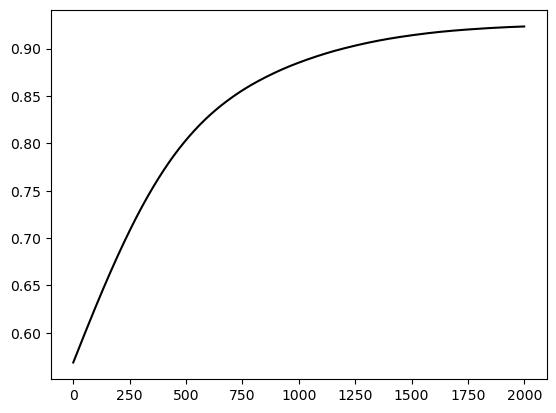

In [56]:
plt.plot(Acxx[:, 0],'black',label="Data")


In [68]:
active_idx = [0]  # Dynamically active modes
r = 1
#threshold = 0.01
tfrac = 0.8  # Proportion of the data to train on
print(t)
M = len(t)
M_train = int(len(t) * tfrac)
print(M_train)
t_train = t[:M_train]
t_test = t[M_train:]

#pod_names = ["a{}".format(i) for i in range(1, r + 1)]
pod_names = ["c{}".format(i) for i in (active_idx)]

print(pod_names)



normalization = sum(np.amax(abs(Acxx), axis=0)[active_idx])
#print(normalization)
xcxx = np.zeros((Acxx.shape[0], r))

#for i in (active_idx):
#    x[:, i] = Avh[:, i] / normalization
#    plt.subplot(r, 1, i + 1)
#    plt.plot(x[:, i])

    
xcxx[:, 0] = Acxx[:, 0] / normalization
#xcxx[:, 1] = Acxx[:, 3] / normalization
#xcxx[:, 2] = Acxx[:, 2] / normalization
#xcxx[:, 3] = Acxx[:, 4] / normalization
#xcxx[:, 1] = Acxx[:, 3] / normalization
#xcxx[:, 2] = Acxx[:, 3] / normalization
#xcxx[:, 3] = Acxx[:, 4] / normalization
print(xcxx[:, 0])

[7.0001 7.0011 7.0021 ... 8.9971 8.9981 8.9991]
1600
['c0']
[0.61591053 0.61656517 0.6172196  ... 0.99997964 0.99998982 1.        ]


In [64]:
xcxx_train = xcxx[:M_train, :]
xcxx0_train = xcxx[0, :]

xcxx_test = xcxx[M_train:, :]
xcxx0_test = xcxx[M_train, :]

#U_train = 1.9440331203736367*np.ones(M_train)  #Acxx[:M_train, 3]

#print(U_train)
#print(xcxx_train.shape)

In [65]:
#library_functions = [lambda x:x, 
#                             lambda x, y, z: x * y * z, lambda x, y: x ** 2 * y,
#                             lambda x, y: x * y ** 2, lambda x: x ** 3]
#library_function_names = [lambda x:x, 
#                                  lambda x, y, z: x + y + z, lambda x, y: x + x + y,
 #                                 lambda x, y: x + y + y, lambda x: x + x + x]

#library_functions = [lambda x:x, lambda x, y: x ** 2 * y, lambda x: x ** 3]
#library_function_names = [lambda x:x, lambda x, y: x + x + y, lambda x: x + x + x]

library_functions = [lambda x:x, 
                             lambda x: x ** 3]
library_function_names = [lambda x:x, 
                                  lambda x: x + x + x]



#library_functions = [lambda x:x, lambda x, y:x * y, lambda x:x ** 2]
#library_function_names = [lambda x:x, lambda x, y:x + y, lambda x:x + x]

#library_functions = [lambda x:x]
#library_function_names = [lambda x:x]


sindy_library = ps.CustomLibrary(library_functions=library_functions,
                                 function_names=library_function_names)

#sindy_library = ps.WeakPDELibrary(library_functions=library_functions,
#                                 function_names=library_function_names,    
#                                  spatiotemporal_grid=t_train,
#                                is_uniform=True,
#                                K=10,
#)

#sindy_library = ps.FourierLibrary(n_frequencies=2)


 #SR3 optimizer with an initial guess
#sindy_opt = ps.SR3(
#    threshold=threshold, nu=100, 
#    initial_guess=initial_guess, max_iter=1000
#)
sindy_opt = ps.SR3(
    threshold=0.0001, nu=1, max_iter=1000)

#sindy_opt = ps.STLSQ(threshold=0.000001, alpha=1e-2)

modelcxx = ps.SINDy(
    optimizer=sindy_opt,
    feature_library=sindy_library,
    #differentiation_method=ps.FiniteDifference(drop_endpoints=True),
    feature_names=pod_names,
    #feature_names=['Ek','Es','Ed', 'O'],
)

# Fit a model on the training data
modelcxx.fit(xcxx_train, t=t_train)
#modelcxx.fit(xcxx_train, t=t_train, u = U_train)
#modelcxx.fit(xcxx_train, t=t_train, u = U_train)
modelcxx.print()
# eigenvalues checking()
Xi = modelcxx.coefficients()
#print(Xi)

(c0)' = 1.657 c0 + -1.975 c0c0c0


In [66]:
t_test_full = np.arange(0,1999,1)
init_time = 0

xcxx_sim = modelcxx.simulate(xcxx[init_time,:], t_test_full[init_time:])
#xcxx_sim = modelcxx.simulate(xcxx[init_time,:], t_test_full[init_time:],u=U_train[init_time:])
print(xcxx_sim.shape)

(1999, 1)


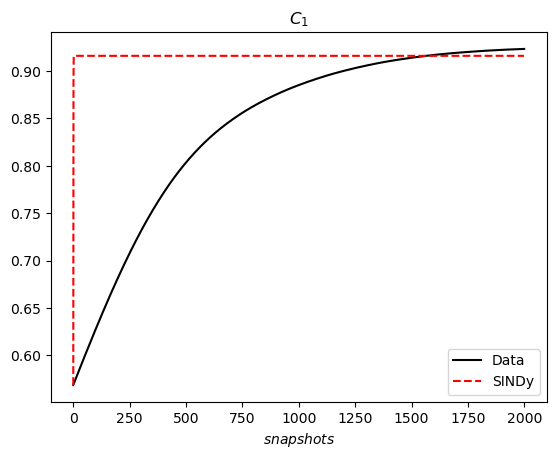

In [67]:
plt.plot(xcxx[init_time:,0],'black',label="Data")
plt.plot(xcxx_sim[:,0], 'r--', label="SINDy")
plt.xlabel('${snapshots}$')
plt.title('$C_1$')
plt.legend()
